**Sentiment Text analyst**

Base on my first experience on studying this domain, I share to you this tutorial. It's a simple way to approach to the sentiment text analyst from 1st steps. I took a reference from an owner of this link: 

https://www.youtube.com/playlist?list=PLhTjy8cBISEoOtB5_nwykvB9wfEDscuEo

Then I present again following my understand. The party of using Tweeter to analysis tweets, I do not follow the tutorial of the above link. I use another algorithms. 

From these first steps, I will continue develop my competences in NLP ahead! 

Hope you are enjoyable and understand well my presentation! 

Let's go...

First, we aim to analysis the sentiments of the text saved in the read.txt file. Note that, you can change whatever you want to analyst, such as only simple sentence or a long talk coppied on the internet or even your diary. :DD

Here, I use a talk relating to Steve Jobs Speech To Graduates of Stanford University.

In [60]:
text = open("/Users/thientrangbui/Dropbox/Kaggle competion/Sentiment analysis/read.txt", encoding="utf-8").read()

In [61]:
text

'I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.\n\nRelated to this story\n2005 Stanford Commencement coverage\nThe first story is about connecting the dots.\n\nI dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?\n\nIt started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were

Now, we are going to apply normal text preprocessing like simple steps: 

* Lowercasing
* Punctuation removal
* Replace extra white, or unimportant items by empty 
* Stopwords removal (we will talk what are stopwords later)

Okey, now we do lowercasing for our text. *That means no-existing any capital alphabets in our text after lowercasing.*

In Python, lower() is a built-in method used for string handling.

The lower() methods returns the lowercased string from the given string. It converts all uppercase characters to lowercase. If no uppercase characters exist, it returns the original string.

In [62]:
#Converting to lowercase
lower_case = text.lower()

In [63]:
#Take a look, all texts enchanging into lowercase
lower_case

'i am honored to be with you today at your commencement from one of the finest universities in the world. i never graduated from college. truth be told, this is the closest i’ve ever gotten to a college graduation. today i want to tell you three stories from my life. that’s it. no big deal. just three stories.\n\nrelated to this story\n2005 stanford commencement coverage\nthe first story is about connecting the dots.\n\ni dropped out of reed college after the first 6 months, but then stayed around as a drop-in for another 18 months or so before i really quit. so why did i drop out?\n\nit started before i was born. my biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. she felt very strongly that i should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. except that when i popped out they decided at the last minute that they really wanted a girl. so my parents, who were

Next, we are removing punctuations in our text. 

You have to create a translation table using **maketrans** that you pass to the **str.translate** method.

In [69]:
#A simple example to remove punctuations in the text.
import string
translator = str.maketrans('', '', string.punctuation)
s = 'string with "punctuation" inside of it! "Does this work?" I hope so.'
print(s.translate(translator))

string with punctuation inside of it Does this work I hope so


In [64]:
#Removing punctuations
import string 

translator = str.maketrans('', '', string.punctuation)
cleaned_text = lower_case.translate(translator)

In [65]:
cleaned_text

'i am honored to be with you today at your commencement from one of the finest universities in the world i never graduated from college truth be told this is the closest i’ve ever gotten to a college graduation today i want to tell you three stories from my life that’s it no big deal just three stories\n\nrelated to this story\n2005 stanford commencement coverage\nthe first story is about connecting the dots\n\ni dropped out of reed college after the first 6 months but then stayed around as a dropin for another 18 months or so before i really quit so why did i drop out\n\nit started before i was born my biological mother was a young unwed college graduate student and she decided to put me up for adoption she felt very strongly that i should be adopted by college graduates so everything was all set for me to be adopted at birth by a lawyer and his wife except that when i popped out they decided at the last minute that they really wanted a girl so my parents who were on a waiting list go

However, after removing punctuations, sometimes there still exits some exceptional punctuations cause the coppied issues. But no problem, we can handle them by using **replace** handly.

In [66]:
#Replace " and " existing in the text by empty 
cleaned_text = cleaned_text.replace('“', '').replace('”','')

In [68]:
cleaned_text #our text now have no any punctuations

'i am honored to be with you today at your commencement from one of the finest universities in the world i never graduated from college truth be told this is the closest i’ve ever gotten to a college graduation today i want to tell you three stories from my life that’s it no big deal just three stories\n\nrelated to this story\n2005 stanford commencement coverage\nthe first story is about connecting the dots\n\ni dropped out of reed college after the first 6 months but then stayed around as a dropin for another 18 months or so before i really quit so why did i drop out\n\nit started before i was born my biological mother was a young unwed college graduate student and she decided to put me up for adoption she felt very strongly that i should be adopted by college graduates so everything was all set for me to be adopted at birth by a lawyer and his wife except that when i popped out they decided at the last minute that they really wanted a girl so my parents who were on a waiting list go

Next, we split our text into simple words - tokenized words by using **split()**. This step, we only do by the hand technique, we will apply later the uniform algorithm from nltk package. 

In [71]:
# splitting text into words
tokenized_words = cleaned_text.split()

In [72]:
tokenized_words

['i',
 'am',
 'honored',
 'to',
 'be',
 'with',
 'you',
 'today',
 'at',
 'your',
 'commencement',
 'from',
 'one',
 'of',
 'the',
 'finest',
 'universities',
 'in',
 'the',
 'world',
 'i',
 'never',
 'graduated',
 'from',
 'college',
 'truth',
 'be',
 'told',
 'this',
 'is',
 'the',
 'closest',
 'i’ve',
 'ever',
 'gotten',
 'to',
 'a',
 'college',
 'graduation',
 'today',
 'i',
 'want',
 'to',
 'tell',
 'you',
 'three',
 'stories',
 'from',
 'my',
 'life',
 'that’s',
 'it',
 'no',
 'big',
 'deal',
 'just',
 'three',
 'stories',
 'related',
 'to',
 'this',
 'story',
 '2005',
 'stanford',
 'commencement',
 'coverage',
 'the',
 'first',
 'story',
 'is',
 'about',
 'connecting',
 'the',
 'dots',
 'i',
 'dropped',
 'out',
 'of',
 'reed',
 'college',
 'after',
 'the',
 'first',
 '6',
 'months',
 'but',
 'then',
 'stayed',
 'around',
 'as',
 'a',
 'dropin',
 'for',
 'another',
 '18',
 'months',
 'or',
 'so',
 'before',
 'i',
 'really',
 'quit',
 'so',
 'why',
 'did',
 'i',
 'drop',
 'out',
 

Now we are removing stopwords. What are the stopwords? Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc. Before introducing about Python's NLTK Library, we use a file including stop words named stop_words.txt.

In [73]:
stop_words = open("/Users/thientrangbui/Dropbox/Kaggle competion/Sentiment analysis/stop_words.txt", encoding="utf-8").read()

In [74]:
#let's see which are stop words, u can add more words if you think they are non-sense to conclude 
#the sentiment in the text
stop_words

'i me my myself we our ours ourselves you your yours yourself yourselves he him his himself she her hers herself it its itself they them their theirs themselves what which who whom this that these those am is are was were be been being have has had having dodoes did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don should now'

In [75]:
stop_words = stop_words.split()

In [46]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'dodoes', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']


Okey, now we are removing stop words for our text and saving the splited texts without stop words into the list named final_words.

In [76]:
#Removing stop words from the tokenized words list
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

In [77]:
final_words

['honored',
 'today',
 'commencement',
 'one',
 'finest',
 'universities',
 'world',
 'never',
 'graduated',
 'college',
 'truth',
 'told',
 'closest',
 'i’ve',
 'ever',
 'gotten',
 'college',
 'graduation',
 'today',
 'want',
 'tell',
 'three',
 'stories',
 'life',
 'that’s',
 'big',
 'deal',
 'three',
 'stories',
 'related',
 'story',
 '2005',
 'stanford',
 'commencement',
 'coverage',
 'first',
 'story',
 'connecting',
 'dots',
 'dropped',
 'reed',
 'college',
 'first',
 '6',
 'months',
 'stayed',
 'around',
 'dropin',
 'another',
 '18',
 'months',
 'really',
 'quit',
 'drop',
 'started',
 'born',
 'biological',
 'mother',
 'young',
 'unwed',
 'college',
 'graduate',
 'student',
 'decided',
 'put',
 'adoption',
 'felt',
 'strongly',
 'adopted',
 'college',
 'graduates',
 'everything',
 'set',
 'adopted',
 'birth',
 'lawyer',
 'wife',
 'except',
 'popped',
 'decided',
 'last',
 'minute',
 'really',
 'wanted',
 'girl',
 'parents',
 'waiting',
 'list',
 'got',
 'call',
 'middle',
 'nig

Next, we are check the sentiment through each word in our final_words list. The idea here that we are comparing the word to word in our list with the emotion.txt file which includes two columns one is the word and another is its definite emotion.

The pipline to do this mission as follows:

NLP Emotion Algorithm
1) Check if the word in the final word list is also present in emotion.txt
- open the emotion file
- Loop through each line and clear it
- Extract the word and emotion using split

2) If word is present -> Add the emotion to emotion_list
3) Finally count each emotion in the emotion list

In [78]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        #print(word)
        if word in final_words:
            print(word) #i want to visualize this step for your seeing how it works
            emotion_list.append(emotion)
            print(emotion_list) #that's also, how it adds more emotion into the emotion_list

animated
[' happy']
important
[' happy', ' happy']
like
[' happy', ' happy', ' attached']
loved
[' happy', ' happy', ' attached', ' attached']
lucky
[' happy', ' happy', ' attached', ' attached', ' happy']
needed
[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted']
rejected
[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted', ' alone']
released
[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted', ' alone', ' free']
replaced
[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated']
satisfied
[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy']
trapped
[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled']
great
[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy']
loved
[' happy', ' happy', '

In [79]:
#Our final emotion_list
print(emotion_list)

[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']


In [80]:
#here we want to count how many time each emotion appearing on whole our text
from collections import Counter

w = Counter(emotion_list)
print(w)

Counter({' happy': 5, ' attached': 2, ' hated': 2, ' entitled': 2, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


Let's show a bar plot to visualize the general emotion in the text.

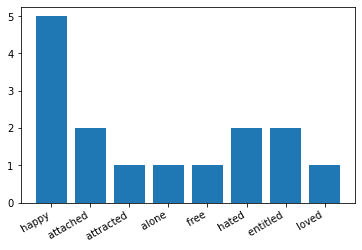

In [81]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

It's absolutely make-sense cause that's a talk of Steve Jobs for his Graduate of Stanford University is almost happy sentiment. 

**Using Python's NLTK Library**

The NLTK library is one of the oldest and most commonly used Python libraries for Natural Language Processing. NLTK supports stop word removal, and you can find the list of stop words in the corpus module. To remove stop words from a sentence, you can divide your text into words and then remove the word if it exits in the list of stop words provided by NLTK.

In [53]:
import matplotlib.pyplot as plt


from nltk.stem import WordNetLemmatizer


/Users/thientrangbui/.local/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Of course, we use the cleaned_text list which we did lowercasing and removed punctuations from the last steps. 

From the cleaned_text list, we apply the word_tokenize of nltk package to split our text into tokenized words.

In [82]:
#Using word_tokenize because it's faster than split()
from nltk.tokenize import word_tokenize

tokenized_words_auto = word_tokenize(cleaned_text, "english") #here you can analyst whichever 
#language depending on our text's language

In [84]:
print(tokenized_words_auto)

['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', 'i', 'never', 'graduated', 'from', 'college', 'truth', 'be', 'told', 'this', 'is', 'the', 'closest', 'i', '’', 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', 'today', 'i', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', 'that', '’', 's', 'it', 'no', 'big', 'deal', 'just', 'three', 'stories', 'related', 'to', 'this', 'story', '2005', 'stanford', 'commencement', 'coverage', 'the', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', 'i', 'dropped', 'out', 'of', 'reed', 'college', 'after', 'the', 'first', '6', 'months', 'but', 'then', 'stayed', 'around', 'as', 'a', 'dropin', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'i', 'really', 'quit', 'so', 'why', 'did', 'i', 'drop', 'out', 'it', 'started', 'before', 'i', 'was', 'born', 'my', 'biological', 'mother', 'was', 'a', 'yo

Very simple way to remove stop words without opening any hand file, we first import the stopwords collection from the nltk.corpus module. And then just removing words belonging to **stopwords.words('english')** we obtain a final words.  

In [85]:
# Removing Stop Words
from nltk.corpus import stopwords

final_words_auto = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words_auto.append(word)

In [86]:
print(final_words_auto)

['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college', 'truth', 'told', 'closest', 'i’ve', 'ever', 'gotten', 'college', 'graduation', 'today', 'want', 'tell', 'three', 'stories', 'life', 'that’s', 'big', 'deal', 'three', 'stories', 'related', 'story', '2005', 'stanford', 'commencement', 'coverage', 'first', 'story', 'connecting', 'dots', 'dropped', 'reed', 'college', 'first', '6', 'months', 'stayed', 'around', 'dropin', 'another', '18', 'months', 'really', 'quit', 'drop', 'started', 'born', 'biological', 'mother', 'young', 'unwed', 'college', 'graduate', 'student', 'decided', 'put', 'adoption', 'felt', 'strongly', 'adopted', 'college', 'graduates', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife', 'except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl', 'parents', 'waiting', 'list', 'got', 'call', 'middle', 'night', 'asking', 'unexpected', 'baby', 'boy', 'want', 'said', 'course', 'biological', 'mother

Next, we are lematizing all words in our text. So, what is lematization?

Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car.

For example,

‘Caring’ -> Lemmatization -> ‘Care’
‘Caring’ -> Stemming -> ‘Car’

In the package nltk, we just simply use the **WordNetLemmatizer().lemmatize(word)** to lematize *word*.

In [87]:
import nltk
#nltk.download() #when you write the code, you should run this sentence to download and install
#all required contents

lemma_words = []
for word in final_words_auto:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [88]:
lemma_words

['honored',
 'today',
 'commencement',
 'one',
 'finest',
 'university',
 'world',
 'never',
 'graduated',
 'college',
 'truth',
 'told',
 'closest',
 'i’ve',
 'ever',
 'gotten',
 'college',
 'graduation',
 'today',
 'want',
 'tell',
 'three',
 'story',
 'life',
 'that’s',
 'big',
 'deal',
 'three',
 'story',
 'related',
 'story',
 '2005',
 'stanford',
 'commencement',
 'coverage',
 'first',
 'story',
 'connecting',
 'dot',
 'dropped',
 'reed',
 'college',
 'first',
 '6',
 'month',
 'stayed',
 'around',
 'dropin',
 'another',
 '18',
 'month',
 'really',
 'quit',
 'drop',
 'started',
 'born',
 'biological',
 'mother',
 'young',
 'unwed',
 'college',
 'graduate',
 'student',
 'decided',
 'put',
 'adoption',
 'felt',
 'strongly',
 'adopted',
 'college',
 'graduate',
 'everything',
 'set',
 'adopted',
 'birth',
 'lawyer',
 'wife',
 'except',
 'popped',
 'decided',
 'last',
 'minute',
 'really',
 'wanted',
 'girl',
 'parent',
 'waiting',
 'list',
 'got',
 'call',
 'middle',
 'night',
 'aski

Here, we create again the emotional list by comparing to the emotions.txt file as we did before. 

In [89]:
emotion_list_auto = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list_auto.append(emotion)


In [91]:
#And of course, we get the same result
print(emotion_list_auto)
w2 = Counter(emotion_list_auto)
print(w2)

[' happy', ' happy', ' attached', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']
Counter({' happy': 5, ' attached': 2, ' hated': 2, ' entitled': 2, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


**VADER (Valence Aware Dictionary for Sentiment Reasoning)**

It is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:

* negative
* neutral
* positive

Let's try for our text!

In [93]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#be careful here, we apply this algorithm directly to the cleanned text that mean after lowercasing and
#removing punctuations 

def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

In [94]:
sentiment_analyse(cleaned_text)

Positive Sentiment


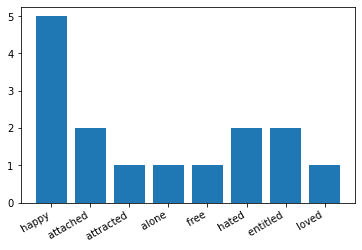

In [70]:
fig, ax1 = plt.subplots()
ax1.bar(w2.keys(), w2.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

**Sentiment analysis for tweets**

We are analysing the emotion for text dowloaded from Tweeter. To obtain tweets by using hashtags from Tweeter we need to have four required items including consumer key, consumer secret, access token and access token secret. You can search few keyword and get the guide on the internet to get these 4 credentials. 

I use here the package Tweepy, a package that provides a very convenient way to use the Twitter API.

Below is the code to get tweets with the hashtag: *#DonaldTrump* from *2020-04-03* and save it to the file ua.csv. You can change whatever number of tweets you want to get by changing the *count*. 

In [1]:
import string

import csv
import pandas as pd

In [32]:
import tweepy
#input your credentials here
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_token_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#Open/Create a file to append data
csvFile = open('/Users/thientrangbui/Dropbox/Kaggle competion/Sentiment analysis/ua.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#DonaldTrump",count=10,
                           lang="en",
                           since="2020-04-03").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2020-10-20 19:22:55 😭😭😭😭😭😭😭😭😭😭😭😭😭😭I'm so pained #endsars #josendprotestnow 
#reformnigeria
#donaldtrump https://t.co/LRJb4aMmEZ
2020-10-20 19:22:50 God please 🙏🙏🙏🙇🙇 save the young people of Nigeria. 
#BuhariResignNow 
#aishayesufu 
#Vatican 
#UnitedNationsHelp… https://t.co/IkHJA7sZBi
2020-10-20 19:22:49 Check out what I'm selling on Mercari! #COVID19 #coronavirus #DonaldTrump  https://t.co/UShPwzwnfS
2020-10-20 19:22:44 RT @MrCliffhanger: Calling on all human right group all over the world! They are shooting at peaceful protesters!#UnitedNationsHelp #Donald…
2020-10-20 19:22:26 @MONSIEURBLAC We are here #phyno #flavour #donaldtrump https://t.co/wHUpn9yrq0
2020-10-20 19:22:23 #EndBadGoveranceInNigeria #DonaldTrump #UnitedNationsHelp  please come to our help urgently https://t.co/Dvqqk52PE3
2020-10-20 19:22:13 @nytimes Don't believe the polls, don't get complacent - #GetOutandVote, especially for #JoeBiden and get our natio… https://t.co/FSOX0HAeqF
2020-10-20 19:21:45 Pray for Nigeria, 

2020-10-20 19:08:06 #AlJazeera #FoxNews #bbcnews #DonaldTrump #EmmanuelMacron #BorisJohnson #pastoradeboye #channelstv #sanwoolu 

Nige… https://t.co/csH9HcLBW2
2020-10-20 19:08:05 @GuardianNigeria #worldpower come and look into our country  NIGERIA
WE NEED HELP #donaldtrump #XiJinping… https://t.co/rIzxaCVY3c
2020-10-20 19:07:50 RT @derekjames150: Why are #DonaldTrump and #BorisJohnson disagreeing with  the scientists now? Trump is condemning Fauci and Johnson is ig…
2020-10-20 19:07:26 [THE TRUTH] Why Liberals and Conservatives Argue :) #Liberal #Conservative #Elections2020 #JoeBiden #DonaldTrump… https://t.co/Qbs8TYrcDD
2020-10-20 19:07:26 RT @ddheruiz: #DonaldTrump complaining about being muted when it's not his turn to speak. Need help? I'll do that job for FREE. #VoteBlueDo…
2020-10-20 19:06:53 @davvydmoore #UnitedNationsHelp ,#DonaldTrump  Nigeria needs your help
2020-10-20 19:06:45 RT @Jason96483011: Pray for Nigeria
#EndPoliceBrutalityinNigeraNOW 
#EndBadGoveranceInNigeria
#Ni

2020-10-20 18:52:54 RT @charleyw: If we learned anything from 2016, it’s that we cannot underestimate #DonaldTrump or his ability to claw his way back into con…
2020-10-20 18:52:35 RT @LeslieMarshall: Check out the latest blog by my good friend @BradBannon for @TheHill.
It's titled, "The clock is ticking and #Trump is…
2020-10-20 18:52:32 RT @LeslieMarshall: Check out the latest blog by my good friend @BradBannon for @TheHill.
It's titled, "The clock is ticking and #Trump is…
2020-10-20 18:52:29 RT @LeslieMarshall: Check out the latest blog by my good friend @BradBannon for @TheHill.
It's titled, "The clock is ticking and #Trump is…
2020-10-20 18:52:26 RT @LeslieMarshall: Check out the latest blog by my good friend @BradBannon for @TheHill.
It's titled, "The clock is ticking and #Trump is…
2020-10-20 18:52:08 RT @derekjames150: Two weeks from today, the American people will vote to evict #DonaldTrump from the White House and reclaim the Senate. I…
2020-10-20 18:50:55 RT @Officialtinger

2020-10-20 18:40:55 RT @off_JudeElue: My country at the moment 😏
Govt using thugs to attack peaceful protesters #UnitedNationsHelp #DonaldTrump #EndPoliceBruta…
2020-10-20 18:40:44 RT @BTLRadioNews: #OnTheAir: Counterpoint airs Mondays 8-10pm ET  https://t.co/OTsd2kQzVZ 89.5 FM Bgpt #CT: Jean Reith Schroedel re: her bo…
2020-10-20 18:39:27 BiblicalCraftsman(@biblicalcraftsman) on TikTok: It's true. #maga #trump2020 #donaldtrump #election https://t.co/9YvZn6RaAt
2020-10-20 18:39:21 RT @derekjames150: Two weeks from today, the American people will vote to evict #DonaldTrump from the White House and reclaim the Senate. I…
2020-10-20 18:39:03 Put America first means every American and not few selects who sway every government to their interest. 

Donald is… https://t.co/EmNUFDoodK
2020-10-20 18:38:51 RT @derekjames150: Two weeks from today, the American people will vote to evict #DonaldTrump from the White House and reclaim the Senate. I…
2020-10-20 18:38:24 The government of Nigeria mobil

2020-10-20 18:27:26 @Jaylend1k y'all see this? get him outta here 😹👎
#NickyMinaj #kpopstans #KPOP  #kpopfans #jiminfanart #JIMIN… https://t.co/mfCIJIkpXN
2020-10-20 18:27:00 @RedState Y'all were the biggest cheerleaders for the Iraq War.

“Yeah [I’m for invading Iraq].”
- #DonaldTrump 11/… https://t.co/oIfYgexOko


In [9]:
#read the file including tweets
import pandas as pd
ua=pd.read_csv("/Users/thientrangbui/Dropbox/Kaggle competion/Sentiment analysis/ua.csv")

In [10]:
ua.columns=["index","text"]

In [11]:
ua

,index,text
0,2020-10-20 19:22:50,b'God please \xf0\x9f\x99\x8f\xf0\x9f\x99\x8f\...
1,2020-10-20 19:22:49,"b""Check out what I'm selling on Mercari! #COVI..."
2,2020-10-20 19:22:44,b'RT @MrCliffhanger: Calling on all human righ...
3,2020-10-20 19:22:26,b'@MONSIEURBLAC We are here #phyno #flavour #d...
4,2020-10-20 19:22:23,b'#EndBadGoveranceInNigeria #DonaldTrump #Unit...
...,...,...
226,2020-10-20 18:29:03,b'Vegas pastor to Trump: \xe2\x80\x98You will ...
227,2020-10-20 18:28:57,"b""#BRITISH STOP KILLINGS PEACEFUL PROTESTER'S\..."
228,2020-10-20 18:28:55,"b""RT @ereguly: Incredible: #DonaldTrump -suppo..."
229,2020-10-20 18:28:54,b'RT @off_JudeElue: My country at the moment \...


In [12]:
#let's see that's an example of a tweet
ua["text"][1]

'b"Check out what I\'m selling on Mercari! #COVID19 #coronavirus #DonaldTrump  https://t.co/UShPwzwnfS"'

As we known, a tweet may contains:
* URL's
* Mentions
* Hashtags
* Emojis
* Smileys
* Specfic words, etc

To clean the tweet, we can use a python library tweet-preprocessor instead of writing the cleaning logic ourself.

In [13]:
import preprocessor as p

In [14]:
#a function to clean tweet in each row of the second column "text"
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [16]:
ua['text'] = ua.apply(preprocess_tweet, axis=1)

In [17]:
#you see: it have no anymore the URL's, mentions, hashtags... so great!!!
ua['text'][1]

'b"Check out what I\'m selling on Mercari! "'

I introduce you here another way to remove stop words automatically by using **remove_stopwords** imported from **gensim.parsing.preprocessing**.

In [18]:
from gensim.parsing.preprocessing import remove_stopwords

In [19]:
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [20]:
ua['text'] = ua.apply(stopword_removal, axis=1)

In [21]:
#no stop words anymore
ua['text'][1]

'b"Check I\'m selling Mercari! "'

As I tole before, sometimes our text includes some weird punctuations, so we can replace them hand-by-hand.

In [22]:
ua['text'] = ua['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').replace('"',' ') 

In [46]:
#our text are cleaned out of punctuations, stop words
ua["text"]

0      b god xf0 x9f x99 x8f xf0 x9f x99 x8f xf0 x9f ...
1                           b check i m selling mercari 
2      b rt calling human right group world they shoo...
3                                                  b we 
4                                  b come help urgently 
                             ...                        
226    b vegas pastor trump xe2 x80 x98you president ...
227    b stop killings peaceful protester s n stop ki...
228    b rt incredible supporting yogurt shop offered...
229    b rt my country moment xf0 x9f x98 x8f ngovt t...
230    b rt why disagreeing scientists now trump cond...
Name: text, Length: 231, dtype: object

In [23]:
ua['text'][1]

'b check i m selling mercari '

In [24]:
ua['text'][1].split()

['b', 'check', 'i', 'm', 'selling', 'mercari']

In [25]:
type(ua['text'][1].split())

list

In [29]:
#change ua["text"] into a list
ua['text'].tolist()

['b god xf0 x9f x99 x8f xf0 x9f x99 x8f xf0 x9f x99 x8f xf0 x9f x99 x87 xf0 x9f x99 x87 save young people nigeria n n n n xe2 x80 xa6 ',
 'b check i m selling mercari ',
 'b rt calling human right group world they shooting peaceful protesters xe2 x80 xa6 ',
 'b we ',
 'b come help urgently ',
 'b don t believe polls don t complacent especially natio xe2 x80 xa6 ',
 'b pray nigeria tl tag n xe2 x80 xa6 ',
 'b beiden campaign ads vs trump campaign ads n xe2 x98 x86 n ',
 'b soldiers firing peaceful unarmed nigerian protesters lekki toll gate lagos xe2 x80 xa6 ',
 'b rt ben shapiro never trumper long time announced support election xe2 x80 xa6 ',
 'b i failed i ve 000 ways won t work n xe2 x80 xa6 ',
 'b rt feeling discouraged amp hopeless re amp us politics general i invi xe2 x80 xa6 ',
 'b rt government officials thugs create excuse innocent protesters nigeria xe2 x80 xa6 ',
 'b i want know n nwhen the f is someone going to run against who isnt a nhow p xe2 x80 xa6 ',
 'b rt if learned 

In [36]:
#create a new list to contain tokenized words in each small list 
our_text=[]
for i in ua['text']:
    a.append(i.split())

In [37]:
a

[['b',
  'god',
  'xf0',
  'x9f',
  'x99',
  'x8f',
  'xf0',
  'x9f',
  'x99',
  'x8f',
  'xf0',
  'x9f',
  'x99',
  'x8f',
  'xf0',
  'x9f',
  'x99',
  'x87',
  'xf0',
  'x9f',
  'x99',
  'x87',
  'save',
  'young',
  'people',
  'nigeria',
  'n',
  'n',
  'n',
  'n',
  'xe2',
  'x80',
  'xa6'],
 ['b', 'check', 'i', 'm', 'selling', 'mercari'],
 ['b',
  'rt',
  'calling',
  'human',
  'right',
  'group',
  'world',
  'they',
  'shooting',
  'peaceful',
  'protesters',
  'xe2',
  'x80',
  'xa6'],
 ['b', 'we'],
 ['b', 'come', 'help', 'urgently'],
 ['b',
  'don',
  't',
  'believe',
  'polls',
  'don',
  't',
  'complacent',
  'especially',
  'natio',
  'xe2',
  'x80',
  'xa6'],
 ['b', 'pray', 'nigeria', 'tl', 'tag', 'n', 'xe2', 'x80', 'xa6'],
 ['b',
  'beiden',
  'campaign',
  'ads',
  'vs',
  'trump',
  'campaign',
  'ads',
  'n',
  'xe2',
  'x98',
  'x86',
  'n'],
 ['b',
  'soldiers',
  'firing',
  'peaceful',
  'unarmed',
  'nigerian',
  'protesters',
  'lekki',
  'toll',
  'gate',
  

We want to consider the big list named our_text as a list of tokenized words. 

In [47]:
a_flat_list = []
for sublist in our_text:
    for item in sublist:
        a_flat_list.append(item)

In [95]:
print(a_flat_list)

['b', 'god', 'xf0', 'x9f', 'x99', 'x8f', 'xf0', 'x9f', 'x99', 'x8f', 'xf0', 'x9f', 'x99', 'x8f', 'xf0', 'x9f', 'x99', 'x87', 'xf0', 'x9f', 'x99', 'x87', 'save', 'young', 'people', 'nigeria', 'n', 'n', 'n', 'n', 'xe2', 'x80', 'xa6', 'b', 'check', 'i', 'm', 'selling', 'mercari', 'b', 'rt', 'calling', 'human', 'right', 'group', 'world', 'they', 'shooting', 'peaceful', 'protesters', 'xe2', 'x80', 'xa6', 'b', 'we', 'b', 'come', 'help', 'urgently', 'b', 'don', 't', 'believe', 'polls', 'don', 't', 'complacent', 'especially', 'natio', 'xe2', 'x80', 'xa6', 'b', 'pray', 'nigeria', 'tl', 'tag', 'n', 'xe2', 'x80', 'xa6', 'b', 'beiden', 'campaign', 'ads', 'vs', 'trump', 'campaign', 'ads', 'n', 'xe2', 'x98', 'x86', 'n', 'b', 'soldiers', 'firing', 'peaceful', 'unarmed', 'nigerian', 'protesters', 'lekki', 'toll', 'gate', 'lagos', 'xe2', 'x80', 'xa6', 'b', 'rt', 'ben', 'shapiro', 'never', 'trumper', 'long', 'time', 'announced', 'support', 'election', 'xe2', 'x80', 'xa6', 'b', 'i', 'failed', 'i', 've', 

In [49]:
#do again as the previous step to get a list of the emotion
emotion_list_ = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in a_flat_list:
            emotion_list_.append(emotion)

In [50]:
emotion_list_

[' average',
 ' apathetic',
 ' demoralized',
 ' powerless',
 ' free',
 ' happy',
 ' hated',
 ' entitled',
 ' attracted',
 ' attracted',
 ' attached',
 ' attached',
 ' safe',
 ' sad',
 ' alone',
 ' happy',
 ' hated',
 ' loved',
 ' happy']

In [58]:
w = Counter(emotion_list_)
print(w)

Counter({' happy': 3, ' hated': 2, ' attracted': 2, ' attached': 2, ' average': 1, ' apathetic': 1, ' demoralized': 1, ' powerless': 1, ' free': 1, ' entitled': 1, ' safe': 1, ' sad': 1, ' alone': 1, ' loved': 1})


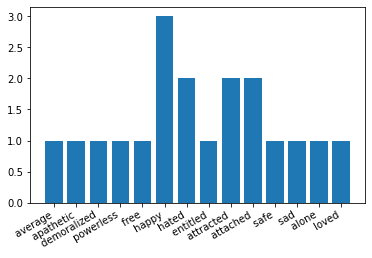

In [59]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

I hope that's helful for your beggining of studying NLP. I'll continue study more and continue of publishing my experience in this domain. Thank you for your reading! 

Best wish for you!